## Data Exploration

Research provides utility functions to query pricing, volume, and returns data for 8000+ US equities, from 2004 up to the most recently completed trading day. These functions take an asset (or list of assets) along with a start and end date, and return a pandas [Series](http://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.Series.html) (or [DataFrame](http://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.html)) indexed by date.  

Let's define the period of time we want to explore and use the `returns` function to query data for AAPL:

In [1]:
# Research environment functions
from quantopian.research import returns, symbols

# Select a time range to inspect
period_start = '2014-01-01'
period_end = '2014-12-31'

# Query returns data for AAPL
# over the selected time range
aapl_returns = returns(
    assets=symbols('AAPL'),
    start=period_start,
    end=period_end,
)

# Display first 10 rows
aapl_returns.head(10)

2014-01-02 00:00:00+00:00   -0.014137
2014-01-03 00:00:00+00:00   -0.022027
2014-01-06 00:00:00+00:00    0.005376
2014-01-07 00:00:00+00:00   -0.007200
2014-01-08 00:00:00+00:00    0.006406
2014-01-09 00:00:00+00:00   -0.012861
2014-01-10 00:00:00+00:00   -0.006674
2014-01-13 00:00:00+00:00    0.005043
2014-01-14 00:00:00+00:00    0.020123
2014-01-15 00:00:00+00:00    0.020079
Freq: C, Name: Equity(24 [AAPL]), dtype: float64

### FactSet Fundamentals

In addition to pricing and volume data, Quantopian integrates corporate fundamentals data sourced from FactSet. Over 800 fundamental data fields are available, and you can find the full list on [this reference page](https://factset.quantopian.com/help/fundamentals).  

Our goal in this tutorial will be to build an algorithm that selects and trades assets based on pricing and fundamentals data. We can start by inspecting the data using Quantopian's Pipeline API, which is a powerful tool you will use over and over again to access and analyze data in Research. You will learn a lot more about the Pipeline API in the next lesson. For now all you need to know is that the following code uses a data pipeline to query market cap, enterprise value, and returns data, and plots the results for AAPL:

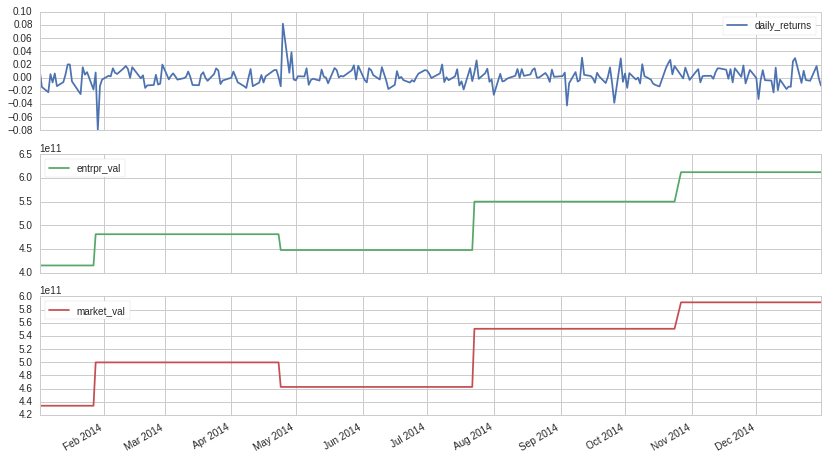

In [2]:
# Pipeline imports
from quantopian.research import run_pipeline
from quantopian.pipeline import Pipeline
from quantopian.pipeline.factors import Returns
from quantopian.pipeline.data import factset

# Pipeline definition
def make_pipeline():

    returns = Returns(window_length=2)
    market_val = factset.Fundamentals.mkt_val.latest
    entrpr_val = factset.Fundamentals.entrpr_val_qf.latest

    return Pipeline(
        columns={
            'daily_returns': returns,
            'market_val': market_val,
            'entrpr_val': entrpr_val,
        },
    )

# Pipeline execution
data_output = run_pipeline(
    make_pipeline(),
    start_date=period_start,
    end_date=period_end
)

# Filter results for AAPL
aapl_output = data_output.xs(
    symbols('AAPL'),
    level=1
)

# Plot results for AAPL
aapl_output.plot(subplots=True);

In the next lesson we will cover the Pipeline API in more depth.